In [18]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns


refugee_df = pd.read_csv('Resources\demographic_ml_df.csv')


Can we cluster Country of Origin with Country of Asylum to determine most likely destination for refugees? 

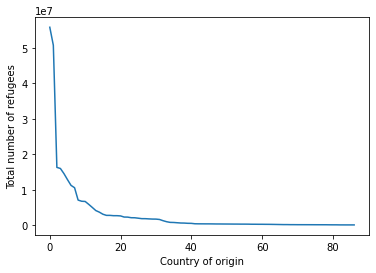

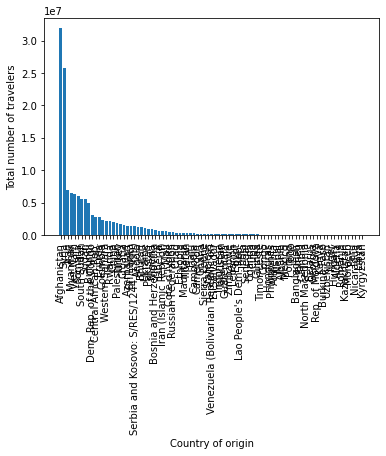

In [43]:
# Group the data by country of origin and country of destination, and sum the total number of travelers
grouped_data = refugee_df.groupby(["country_origin", "country_asylum"])["total"].sum().reset_index()

# Create a pivot table to summarize the data by country of origin and country of destination
pivot_table = pd.pivot_table(grouped_data, values="total", index="country_origin", columns="country_asylum", aggfunc=sum, fill_value=0)

# Calculate the total number of travelers from each country of origin to all destinations
total_refugees = pivot_table.sum(axis=1)

# Sort the countries by the total number of travelers in descending order
sorted_countries = total_refugees.sort_values(ascending=False)

# Sort the data by the total number of travelers in descending order
sorted_data = grouped_data.sort_values("total", ascending=False)

# Plot the trend of the total number of travelers from each country of origin
plt.plot(sorted_countries.values)
plt.xlabel("Country of origin")
plt.ylabel("Total number of refugees")
plt.show()

plt.bar(sorted_data["country_origin"], sorted_data["total"])
plt.xticks(rotation=90)
plt.xlabel("Country of origin")
plt.ylabel("Total number of travelers")
plt.show()

# sns.heatmap(pivot_table, cmap="YlGnBu")
# plt.xlabel("Country of asylum")
# plt.ylabel("Country of origin")
# plt.show()

# pivot_table.plot(kind="area", stacked=True)
# plt.xlabel("Year")
# plt.ylabel("Total number of travelers")
# plt.show()

# plt.scatter(grouped_data["country_asylum"], grouped_data["country_origin"], s=grouped_data["total"]/10)
# plt.xlabel("Country of asylum")
# plt.ylabel("Country of origin")
# plt.show()

In [45]:
pivot_table

country_asylum,Afghanistan,Albania,Algeria,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,...,United Rep. of Tanzania,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Yemen,Zambia,Zimbabwe
country_origin,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,5,0,0,0,61,15,165386,299659,9906,...,0,80612,5,48722,0,90,0,0,0,268
Albania,0,0,0,0,0,400,0,1034,2721,0,...,0,83472,0,0,0,0,0,0,0,0
Algeria,0,0,0,0,0,910,0,1277,638,0,...,0,7744,0,0,0,0,0,50,0,0
Angola,0,0,25,0,0,284,0,70,2180,0,...,0,4479,51,0,0,0,0,0,914451,1242
Armenia,0,0,0,0,0,1760,0,87,11597,28,...,0,88692,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela (Bolivarian Republic of),0,25,0,0,0,952,0,482,180,0,...,0,133820,745,0,0,0,0,0,0,0
Viet Nam,0,0,0,0,0,229,0,4313,1203,0,...,0,159516,0,0,0,0,0,396,0,0
Western Sahara,0,0,2190000,209,0,0,0,0,0,0,...,0,0,0,0,0,66,0,0,0,0


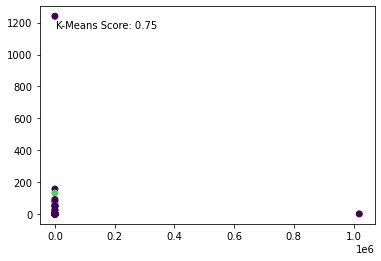

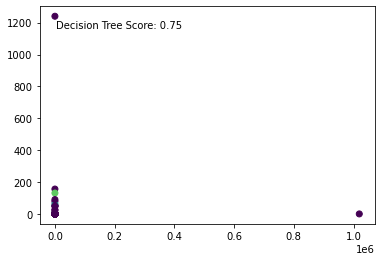

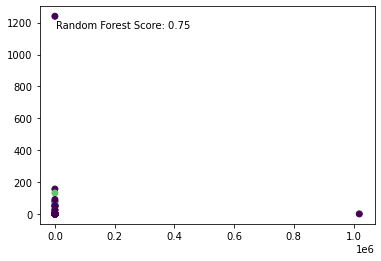

In [47]:
# Aggregate the values in duplicate entries using the sum function
c_df = refugee_df.groupby(['country_origin', 'country_asylum']).sum().reset_index()

X = c_df.pivot(index='country_origin', columns='country_asylum', values='total').fillna(0).values

# Apply K-Means clustering
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
kmeans_labels = kmeans.labels_
kmeans_score = silhouette_score(X, kmeans_labels)

# Apply Decision Tree clustering
dt = DecisionTreeClassifier(max_depth=5, random_state=0)
dt.fit(X, kmeans_labels)
dt_labels = dt.predict(X)
dt_score = silhouette_score(X, dt_labels)

# Apply Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X, kmeans_labels)
rf_labels = rf.predict(X)
rf_score = silhouette_score(X, rf_labels)

# Plot the scatter chart
plt.scatter(X[:, 0], X[:, 1], c=kmeans_labels)
plt.annotate(f"K-Means Score: {kmeans_score:.2f}", xy=(0.05, 0.9), xycoords='axes fraction')
plt.show()

plt.scatter(X[:, 0], X[:, 1], c=dt_labels)
plt.annotate(f"Decision Tree Score: {dt_score:.2f}", xy=(0.05, 0.9), xycoords='axes fraction')
plt.show()

plt.scatter(X[:, 0], X[:, 1], c=rf_labels)
plt.annotate(f"Random Forest Score: {rf_score:.2f}", xy=(0.05, 0.9), xycoords='axes fraction')
plt.show()



In [23]:
c_df

,country_origin,country_asylum,Unnamed: 0,year,share_borders,female_0to4,female_5to11,female_12to17,female_18to59,female_60,...,unknown_demographic,male_60,male_other,Male total,total,recognized_decisions,complementary_protection,rejected,otherwise_closed,total_decisions
0,Afghanistan,Albania,57607,2021,0,0,5,0,0,0,...,0,0,0,0,5,5.0,0.0,0.0,0.0,5.0
1,Afghanistan,Argentina,366034,16140,0,0,0,0,15,0,...,0,0,0,46,61,10.0,0.0,0.0,0.0,10.0
2,Afghanistan,Armenia,162392,6060,0,0,0,0,0,0,...,0,0,0,15,15,5.0,0.0,0.0,15.0,20.0
3,Afghanistan,Australia,560887,42231,0,0,0,0,0,0,...,165386,0,0,0,165386,16412.0,0.0,4229.0,175.0,20816.0
4,Afghanistan,Austria,560908,42231,0,0,0,0,0,0,...,299659,0,0,0,299659,30579.0,17385.0,15253.0,26431.0,89648.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4589,Zimbabwe,Thailand,183251,8065,0,0,0,0,0,0,...,0,0,0,31,31,25.0,0.0,0.0,0.0,25.0
4590,Zimbabwe,Turkey,50664,2018,0,0,0,0,6,0,...,0,0,0,0,6,5.0,0.0,0.0,0.0,5.0
4591,Zimbabwe,United Kingdom of Great Britain and Northern I...,622023,42231,0,0,0,0,0,0,...,163414,0,0,0,163414,15686.0,1586.0,42640.0,3592.0,63544.0
4592,Zimbabwe,United States of America,619829,40230,0,0,0,0,0,0,...,22559,0,0,0,22559,1982.0,5.0,1766.0,1331.0,5084.0


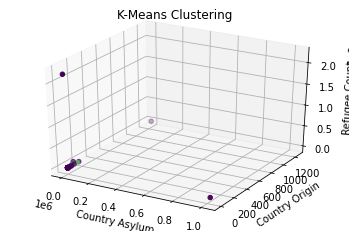

In [34]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=kmeans_labels)
ax.set_xlabel('Country Asylum')
ax.set_ylabel('Country Origin')
ax.set_zlabel('Refugee Count')
plt.title('K-Means Clustering')
plt.show()

Unsupervised Learning Models

We can use K-means or Hierarchical clustering to group countries of origin based on their similarity in terms of the total number of travelers to each country of destination. Once the clustering is done, we can assign the most frequent country of destination to each cluster as the most likely destination for that cluster.

K-Means Clustering

In [48]:
from sklearn.cluster import KMeans

# Perform K-means clustering with k=5 (you can adjust this parameter based on your data)
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(pivot_table)

# Assign the most frequent country of destination to each cluster as the most likely destination for that cluster
clusters = pd.DataFrame({"country_origin": pivot_table.index, "cluster": kmeans.labels_})
most_likely_destinations = clusters.join(grouped_data.set_index("country_origin")).groupby("cluster")["country_destination"].apply(lambda x: x.value_counts().index[0]).reset_index()

print(most_likely_destinations)

TypeError: '<' not supported between instances of 'int' and 'str'

Hierarchical Clustering

TypeError: '<' not supported between instances of 'int' and 'str'

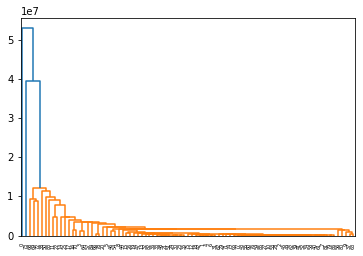

In [60]:
import scipy.cluster.hierarchy as sch


# Perform hierarchical clustering with linkage method "ward"
dendrogram = sch.dendrogram(sch.linkage(pivot_table, method="ward"))

# Based on the dendrogram, set the number of clusters to 5 (you can adjust this parameter based on your data)
num_clusters = 5

# Perform hierarchical clustering with the chosen number of clusters
hc = sch.fcluster(sch.linkage(pivot_table, method="ward"), num_clusters, "maxclust")

# Assign the most frequent country of destination to each cluster as the most likely destination for that cluster
clusters = pd.DataFrame({"country_origin": pivot_table.index, "cluster": hc})
most_likely_destinations = clusters.join(grouped_data.set_index("country_origin")).groupby

Supervised Learning Models

In [50]:
# # Group the data by country of origin and country of destination, and sum the total number of travelers
# grouped_data = data.groupby(["country_origin", "country_destination"])["total_traveled"].sum().reset_index()

# # Create a pivot table to summarize the data by country of origin and country of destination
# pivot_table = pd.pivot_table(grouped_data, values="total_traveled", index="country_origin", columns="country_destination")

# Flatten the pivot table to create the feature matrix X and the target vector y
X = pivot_table.values
y = pivot_table.columns.values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier with 100 estimators (you can adjust this parameter based on your data)
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predict the most likely country of destination for each country of origin in the testing set
y_pred = clf.predict(X_test)

# Evaluate the accuracy of the model
accuracy = sum(y_pred == y_test) / len(y_test)
print("Accuracy:", accuracy)

ValueError: Found input variables with inconsistent numbers of samples: [87, 178]

In [59]:
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split

# Flatten the pivot table to create the feature matrix X and the target vector y
X = pivot_table.values
y = pivot_table.columns.values
print(X.shape)
print(y.shape)
y

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Train a Gradient Boosting Classifier with 100 estimators and a learning rate of 0.1 (you can adjust these parameters based on your data)
# clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
# clf.fit(X_train, y_train)

# # Predict the most likely country of destination for each country of origin in the testing set
# y_pred = clf.predict(X_test)

# # Evaluate the accuracy of the model
# accuracy = sum(y_pred == y_test) / len(y_test)
# print("Accuracy:", accuracy)

(87, 178)
(178,)


array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cambodia', 'Cameroon', 'Canada', 'Cayman Islands',
       'Central African Rep.', 'Chad', 'Chile', 'China',
       'China, Hong Kong SAR', 'China, Macao SAR', 'Colombia', 'Comoros',
       'Congo', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba',
       'Curacao ', 'Cyprus', 'Czechia', 'Dem. Rep. of the Congo',
       'Denmark', 'Djibouti', 'Dominican Rep.', 'Ecuador', 'Egypt',
       'El Salvador', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia',
       'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia',
       'Germany', 'Ghana', 'Greece', 'Grenada', 'Guatemala', 'Guinea',
       'Guinea-Bissau', 'Guyana